# Map the most limiting factor for each phytoplankton group

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio

In [2]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

In [4]:
limiting= sio.loadmat('most_limiting_surf_index_nutrient.mat')
diaz_index = limiting['diaz_index']
pp_index = limiting['pp_index']
mp4_index = limiting['mp4_index']
mp3_index = limiting['mp3_index']
mp2_index = limiting['mp2_index']
mp1_index = limiting['mp1_index']
diat1_index = limiting['diat1_index']
diat2_index = limiting['diat2_index']
diat3_index = limiting['diat3_index']

## Diazotrophs

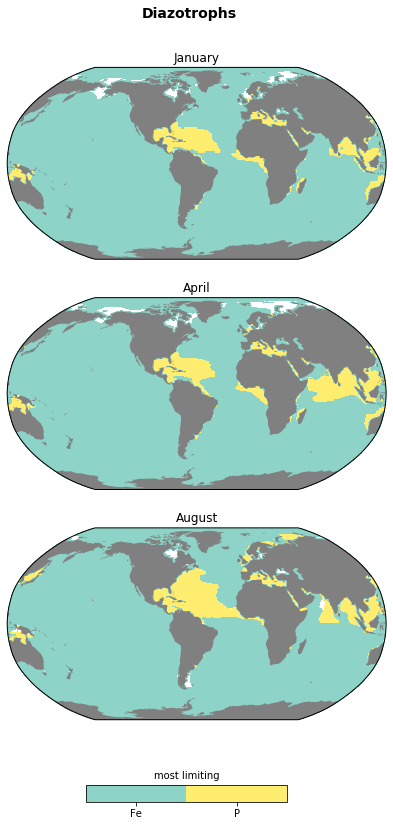

In [7]:
# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(diaz_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 2), transform=ccrs.PlateCarree(), vmin =0, vmax =2)
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(diaz_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 2), transform=ccrs.PlateCarree(), vmin =0, vmax =2)
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(diaz_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 2), transform=ccrs.PlateCarree(), vmin =0, vmax =2)
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe', 'P'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('Diazotrophs', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_diaz_nutr.png')

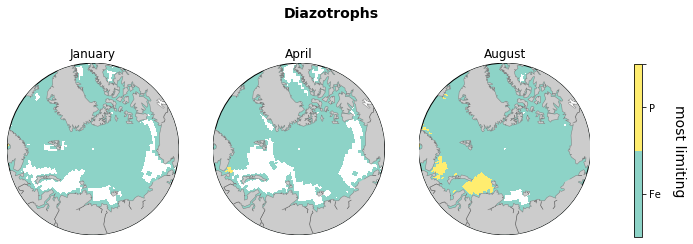

In [8]:
fig = plt.figure(figsize=(12,8))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m.pcolor(x,y,diaz_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 2), vmin =0, vmax =2)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,diaz_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 2), vmin =0, vmax =2)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolor(x,y,diaz_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 2), vmin =0, vmax =2)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('Diazotrophs', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5, 2.0])
cbar.ax.set_yticklabels(['Fe', 'P'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_diaz_nutr_ao.png')

## Picoplankton 

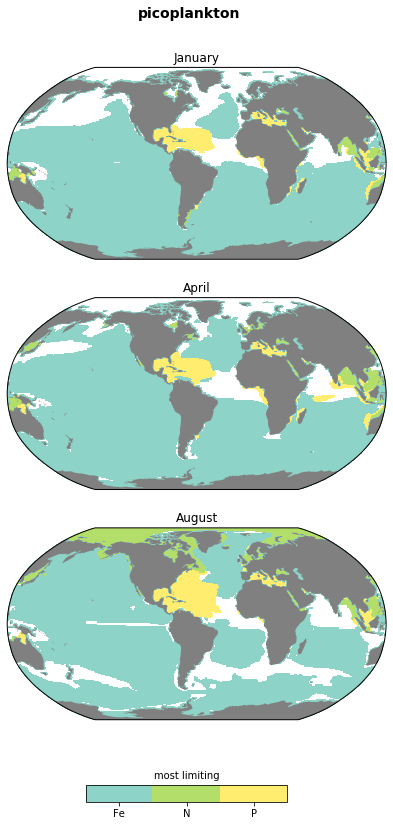

In [9]:
# levels
levels = [0, 0.9, 1.9,  2.9, 3.9,4.9]

# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(pp_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 3), vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(pp_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 3), vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(pp_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 3), vmin =0, vmax =3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe','N', 'P'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('picoplankton', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_pp_nutr.png')

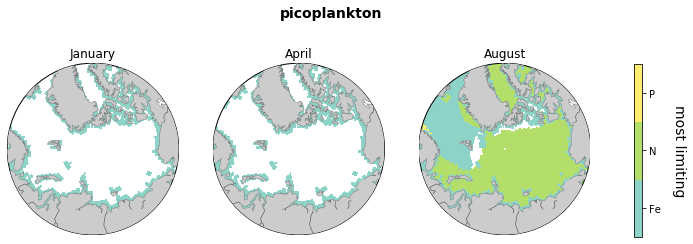

In [10]:
fig = plt.figure(figsize=(12,8))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,pp_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,pp_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,pp_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('picoplankton', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Fe', 'N', 'P'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_pp_nutr_ao.png')

## diatom 1

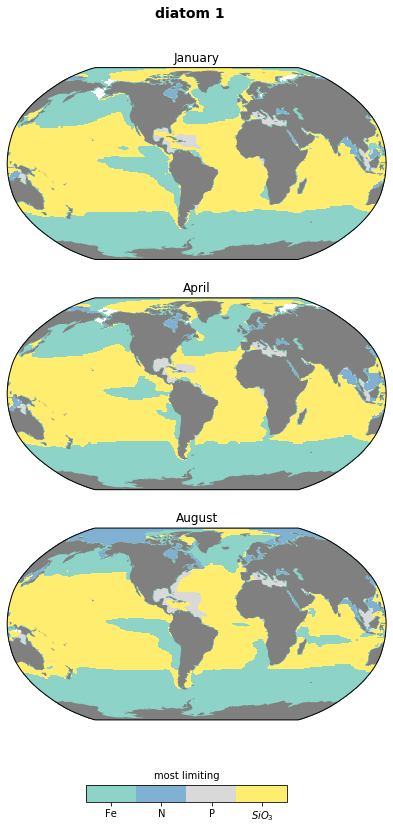

In [11]:
# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(diat1_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(diat1_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(diat1_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe', 'N','P','$SiO_3$'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('diatom 1', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_diat1_nutr.png')

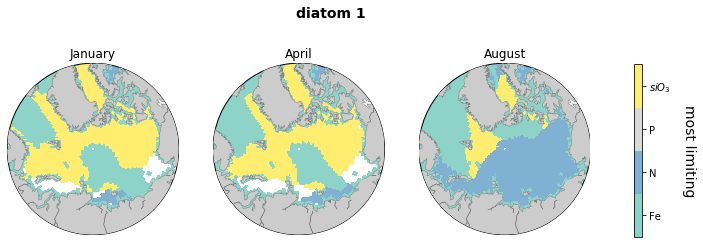

In [12]:
fig = plt.figure(figsize=(12,8))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,diat1_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,diat1_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,diat1_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('diatom 1', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5])
cbar.ax.set_yticklabels(['Fe', 'N','P','$siO_3$'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_diat1_nutr_ao.png')

## diatom 2

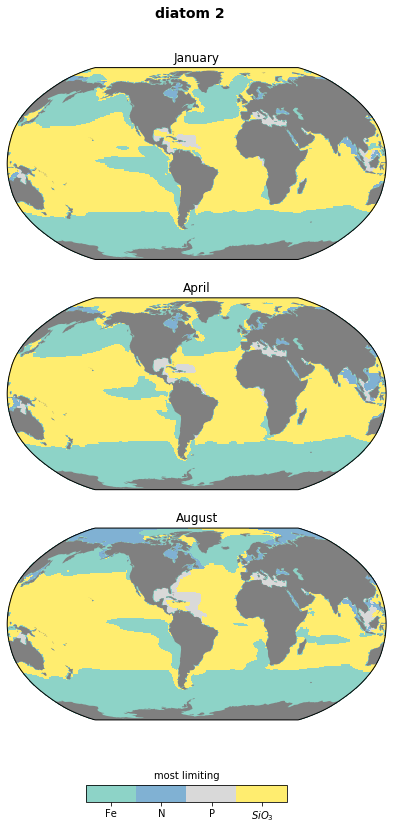

In [13]:
# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(diat2_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(diat2_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(diat2_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe', 'N','P','$SiO_3$'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('diatom 2', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_diat2_nutr.png')

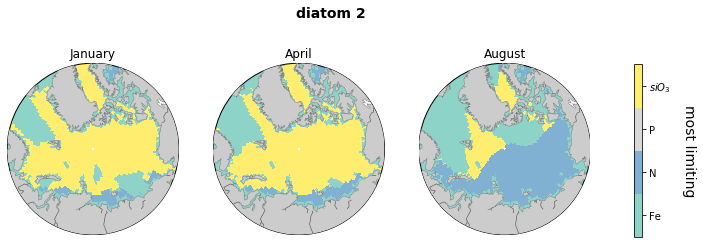

In [14]:
fig = plt.figure(figsize=(12,8))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,diat2_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,diat2_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,diat2_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('diatom 2', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5])
cbar.ax.set_yticklabels(['Fe', 'N', 'P', '$siO_3$'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_diat2_nutr_ao.png')

## diatom 3

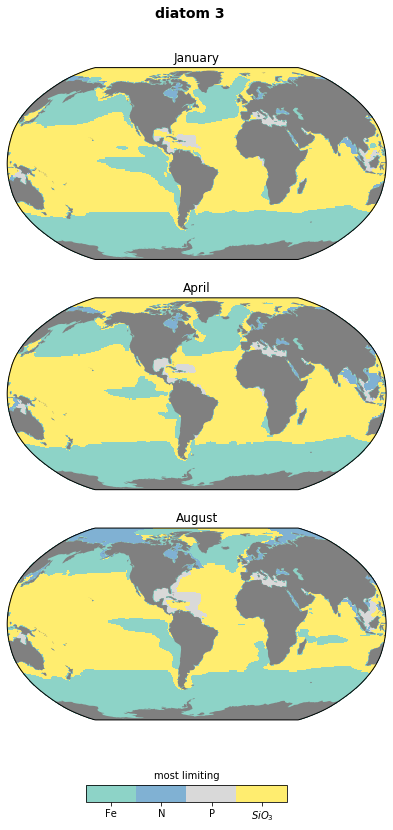

In [15]:
# levels
levels = [0, 0.9, 1.9,  2.9, 3.9,4.9, 5.9]

# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(diat3_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(diat3_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(diat3_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 4), vmin =0, vmax =4, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe', 'N','P','$SiO_3$'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('diatom 3', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_diat3_nutr.png')

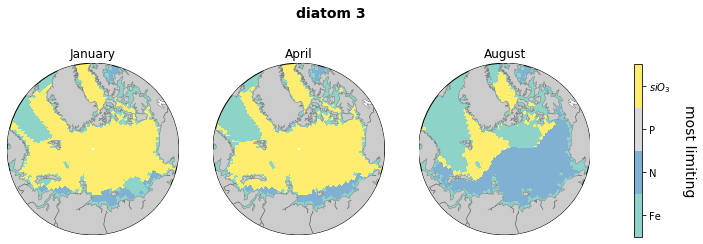

In [16]:
fig = plt.figure(figsize=(12,8))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,diat3_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolormesh(x,y,diat3_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolormesh(x,y,diat3_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 4), vmin = 0, vmax = 4)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('diatom 3', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5,3.5])
cbar.ax.set_yticklabels(['Fe', 'N', 'P','$siO_3$'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_diat3_allnutr_ao.png')

## Mixed phytoplankton 1

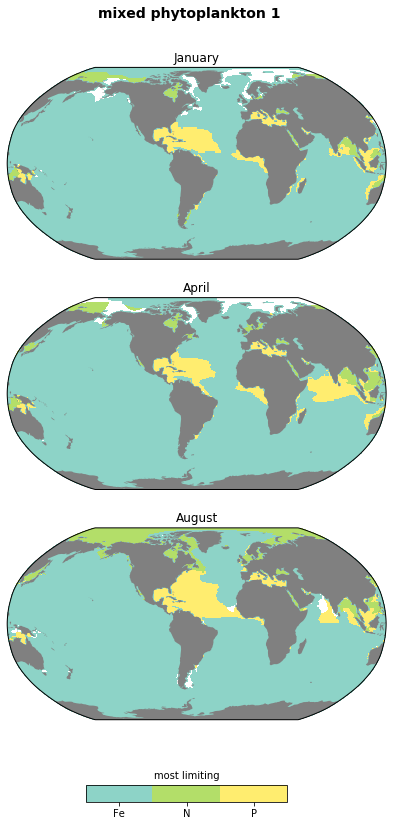

In [17]:
# levels
levels = [0, 0.9, 1.9,  2.9, 3.9,4.9]

# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(mp1_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(mp1_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(mp1_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe', 'N','P'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('mixed phytoplankton 1', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_mp1_allnutr.png')

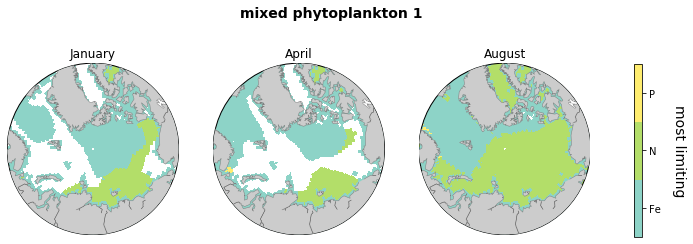

In [18]:
fig = plt.figure(figsize=(12,8))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,mp1_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,mp1_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolor(x,y,mp1_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('mixed phytoplankton 1', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Fe', 'N', 'P'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_mp1_nutr_ao.png')

## Mixed phytoplankton 2

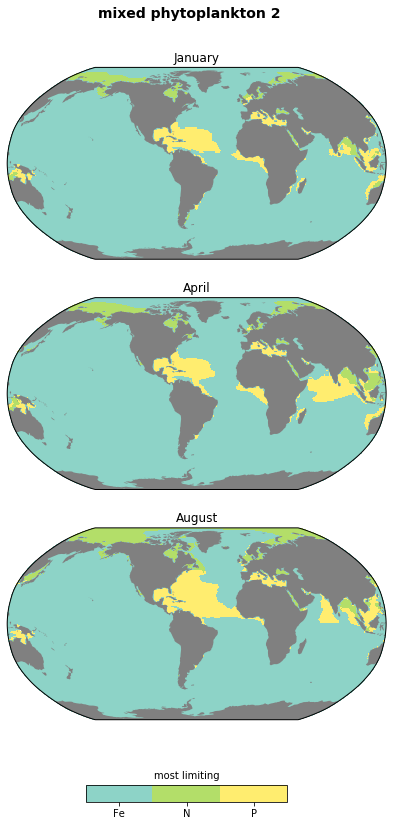

In [19]:
# levels
levels = [0, 0.9, 1.9,  2.9, 3.9,4.9]

# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(mp2_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(mp2_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(mp2_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe', 'N','P'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('mixed phytoplankton 2', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_mp2_allnutr.png')

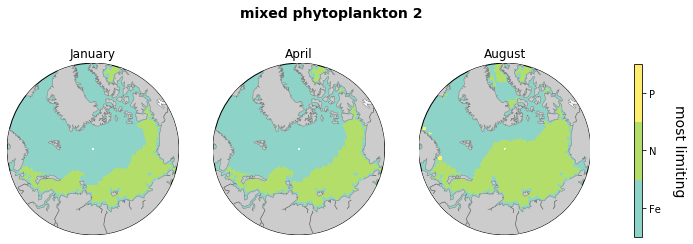

In [20]:
fig = plt.figure(figsize=(12,8))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,mp2_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,mp2_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolor(x,y,mp2_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('mixed phytoplankton 2', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Fe', 'N', 'P'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_mp2_nutr_ao.png')

## Mixed phytoplankton 3

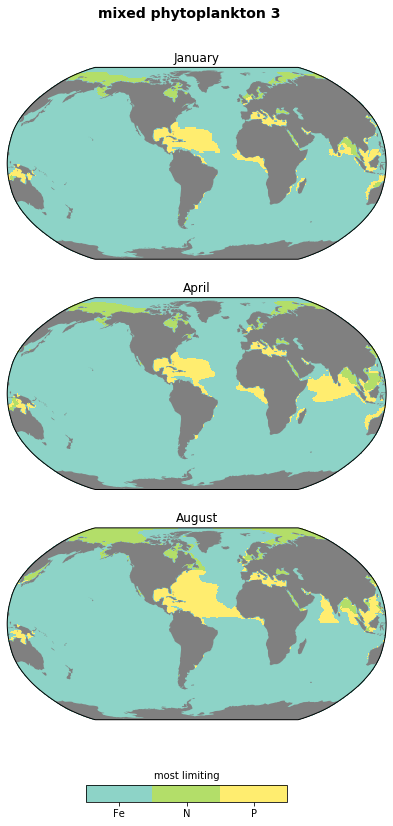

In [21]:
# levels
levels = [0, 0.9, 1.9,  2.9, 3.9,4.9]

# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(mp3_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(mp3_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(mp3_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe', 'N','P'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('mixed phytoplankton 3', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_mp3_nutr.png')

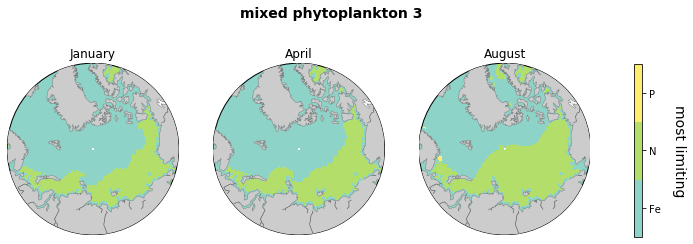

In [22]:
fig = plt.figure(figsize=(12,8))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,mp3_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,mp3_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolor(x,y,mp3_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('mixed phytoplankton 3', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Fe', 'N', 'P'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_mp3_nutr_ao.png')

## Mixed phytoplankton 4

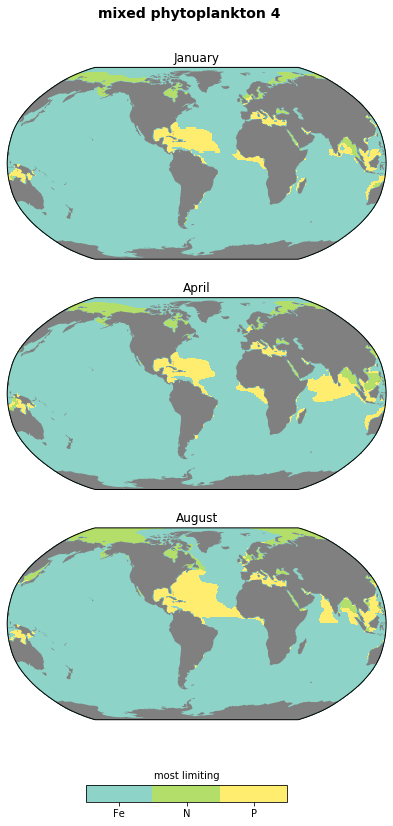

In [23]:
# levels
levels = [0, 0.9, 1.9,  2.9, 3.9,4.9]

# figure 
fig = plt.figure(figsize=(8, 12))
lat = ds.lat

# January 
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))
jan, lon = add_cyclic_point(mp4_index[0,:,:], coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, jan, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('January')

# April 
ax1 = fig.add_subplot(3, 1, 2 , projection=ccrs.Robinson(central_longitude=305.0))
apr, lon = add_cyclic_point(mp4_index[3,:,:], coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, apr, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('April')

# August 
ax2 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=305.0))
aug, lon = add_cyclic_point(mp4_index[7,:,:], coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, aug, cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3, transform=ccrs.PlateCarree())
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('August')

# colorbar and labels
cbar_ax = fig.add_axes([0.32, 0.03, 0.35, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5],orientation="horizontal")
cbar.ax.set_xticklabels(['Fe', 'N','P'])
cbar.ax.set_title('most limiting', fontsize = 10)
fig.suptitle('mixed phytoplankton 4', x=0.5, y=.95,fontsize=14, fontweight='bold')

fig.savefig('surf_lim_mp4_nutr.png')

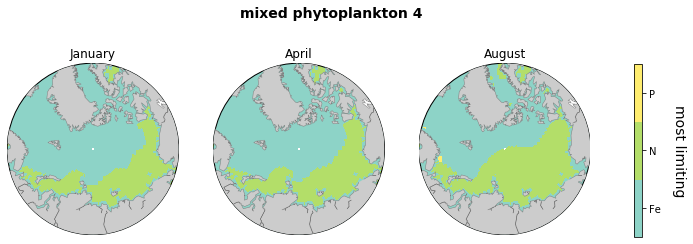

In [24]:
fig = plt.figure(figsize=(12,8))
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# January
ax = fig.add_subplot(131) 
ax.set_title("January")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,mp4_index[0,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(132) 
ax.set_title("April")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
m.pcolor(x,y,mp4_index[3,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


# January
ax = fig.add_subplot(133) 
ax.set_title("August")
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
im = m.pcolor(x,y,mp4_index[7,:,:],cmap=plt.cm.get_cmap('Set3', 3), vmin = 0, vmax = 3)
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)


fig.suptitle('mixed phytoplankton 4', x=0.5, y=.75,fontsize=14, fontweight='bold')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
cbar = fig.colorbar(im, cax=cbar_ax, shrink=0.5, spacing='uniform',ticks=[0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Fe', 'N', 'P'])
cbar.ax.set_ylabel('most limiting', rotation=270,labelpad=25, fontsize = 14)
m.plot
plt.show()

fig.savefig('surf_lim_mp4_nutr_ao.png')